In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [2]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [3]:
pinkwink_web = pd.read_csv('../data/08. PinkWink Web Traffic.csv', 
                                          encoding='utf-8', thousands=',',
                                          names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()
# 이 책 저자의 블로그 웹 트래픽 데이터 (hit = 유입량)

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


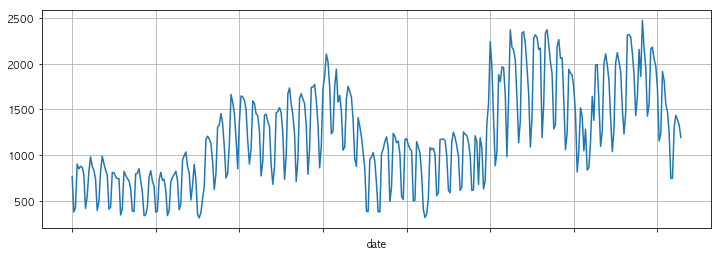

In [4]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)

In [5]:
time = np.arange(0, len(pinkwink_web)) #시간축
traffic = pinkwink_web['hit'].values #데이터

fx = np.linspace(0,time[-1], 1000)

In [6]:
#에러 함수 정의
def error(f,x,y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [7]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

# 1차, 2차, 3차, 15차 함수로 표현해서 확인했더니 1,2,3차는 에러가 비슷함

430.85973081109626
430.6284101894695
429.53280466762925
330.477730664871


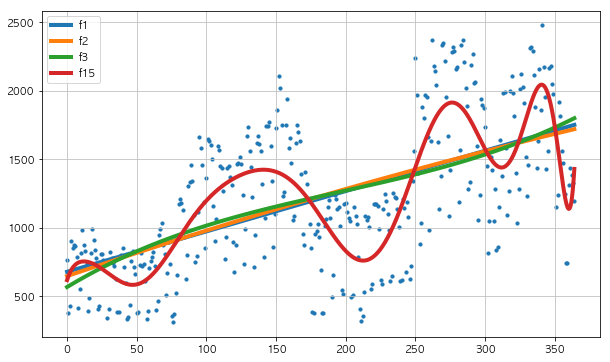

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()
# 1차, 2차, 3차, 15차 함수를 그래프로 확인

In [9]:
# 1,2,3차는 비슷하므로 1차를 쓰는게 나음
# 15차는 오버피팅처럼 보임
# 이 그래프만 보고는 잘 모르겠음 -> 앞으로 어떻게 될지도 보고싶음

In [10]:
# Prophet모듈을 이용한 forcast 예측
df = pd.DataFrame({'ds': pinkwink_web.index, 'y': pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%y. %m. %d.')
del df['date']

In [11]:
m = Prophet(yearly_seasonality=True) #주기는 연단위
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = m.make_future_dataframe(periods=60) #이후 60일간의 데이터를 예측할것
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [13]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,924.007252,705.754505,1132.134604
421,2017-08-26,509.019918,297.936605,716.868553
422,2017-08-27,641.503999,437.206376,854.171901
423,2017-08-28,1194.071095,975.498913,1420.094429
424,2017-08-29,1229.894880,1021.226441,1447.481924


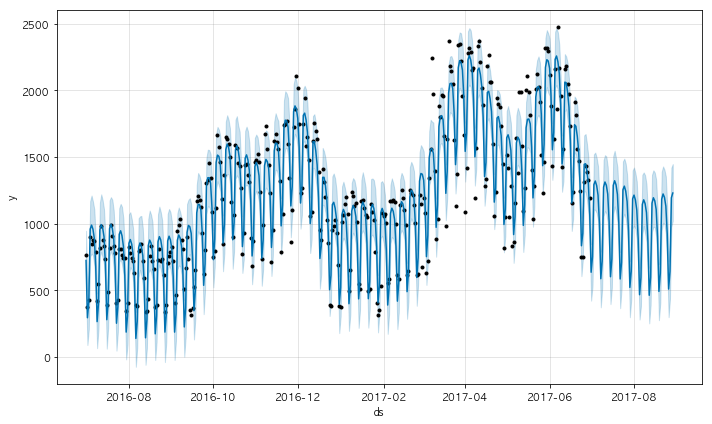

In [14]:
m.plot(forecast); # 2017년 6월말까지의 데이터(다운받은) 이후 약 2개월(60일)의 예측 결과가 나타남

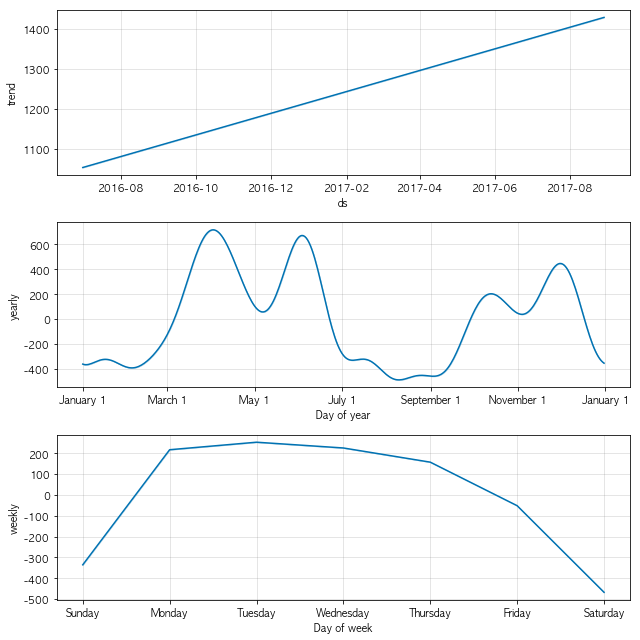

In [15]:
m.plot_components(forecast);
# 전체적인 경향은 직선
# 월,화,수요일에 방문자가 많음
# 3월부터 상승해서 7월쯤 내려가기 시작, 9월에 상승해서 12월에 내려옴

# 앞으로의 예측부터 주별, 연간 데이터의 현황 분석을 Seasonal 시계열 데이터 분석이라고 함

In [18]:
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

start_date = '1990-1-1' 
end_date = '2017-6-30' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
    
# KIA = web.DataReader('KRX:000270','google',start,end) # 구글용... 동작이 안됨
# KIA = web.DataReader('000270.KS','yahoo',start,end) # 구글용... 동작이 안됨
KIA

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.520020,7665.240234,7300.229980,7665.240234,5963.754395,636300
2000-01-05,7404.520020,7404.520020,7248.089844,7248.089844,5639.200684,686100
2000-01-06,7331.520020,7519.240234,6935.220215,6935.220215,5395.779297,379000
2000-01-07,6987.359863,7143.799805,6778.790039,6778.790039,5274.072754,701400
2000-01-10,6841.359863,7102.080078,6810.069824,7091.649902,5517.486816,1076700
2000-01-11,7143.799805,7717.390137,7143.799805,7717.390137,6004.329590,1127200
2000-01-12,7717.390137,8447.410156,7300.229980,7508.810059,5842.046875,1606600
2000-01-13,7696.529785,7696.529785,7195.939941,7195.939941,5598.626953,702700
2000-01-14,7195.939941,7508.810059,6987.359863,7508.810059,5842.046875,843900


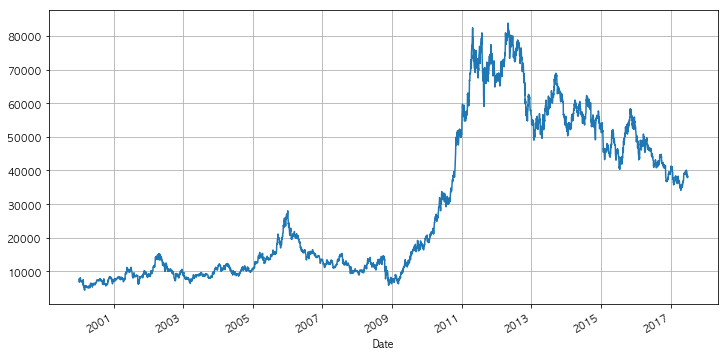

In [19]:
KIA['Close'].plot(figsize=(12,6), grid=True) #종가 기준으로 그래프 작성

In [20]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.520020,7665.240234,7300.229980,7665.240234,5963.754395,636300
2000-01-05,7404.520020,7404.520020,7248.089844,7248.089844,5639.200684,686100
2000-01-06,7331.520020,7519.240234,6935.220215,6935.220215,5395.779297,379000
2000-01-07,6987.359863,7143.799805,6778.790039,6778.790039,5274.072754,701400
2000-01-10,6841.359863,7102.080078,6810.069824,7091.649902,5517.486816,1076700
2000-01-11,7143.799805,7717.390137,7143.799805,7717.390137,6004.329590,1127200
2000-01-12,7717.390137,8447.410156,7300.229980,7508.810059,5842.046875,1606600
2000-01-13,7696.529785,7696.529785,7195.939941,7195.939941,5598.626953,702700
2000-01-14,7195.939941,7508.810059,6987.359863,7508.810059,5842.046875,843900


In [21]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2000-01-04,7665.240234
1,2000-01-05,7248.089844
2,2000-01-06,6935.220215
3,2000-01-07,6778.790039
4,2000-01-10,7091.649902


In [22]:
# 1년 후인 2017.12.31일까지의 정보를 예측해봄
m = Prophet()
m.fit(df);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4578,2017-12-25
4579,2017-12-26
4580,2017-12-27
4581,2017-12-28
4582,2017-12-29


In [24]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4578,2017-12-25,35978.082250,28333.515304,43988.383578
4579,2017-12-26,36018.973259,28364.237535,45223.196432
4580,2017-12-27,35988.403278,28402.583064,44912.655341
4581,2017-12-28,35953.685750,28950.326038,44693.405797
4582,2017-12-29,35892.060207,27857.581288,44940.997810


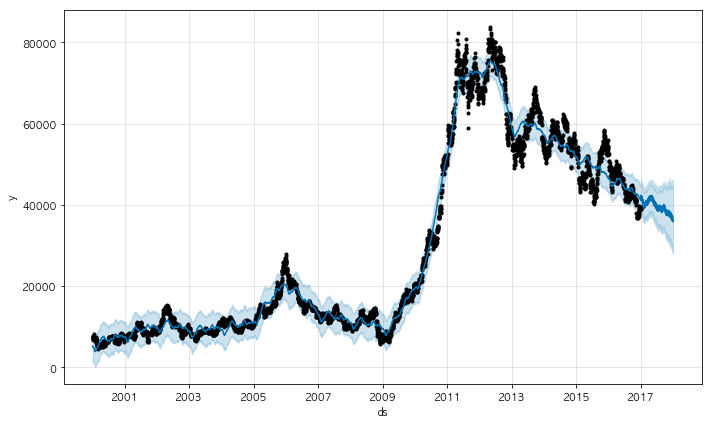

In [25]:
m.plot(forecast);

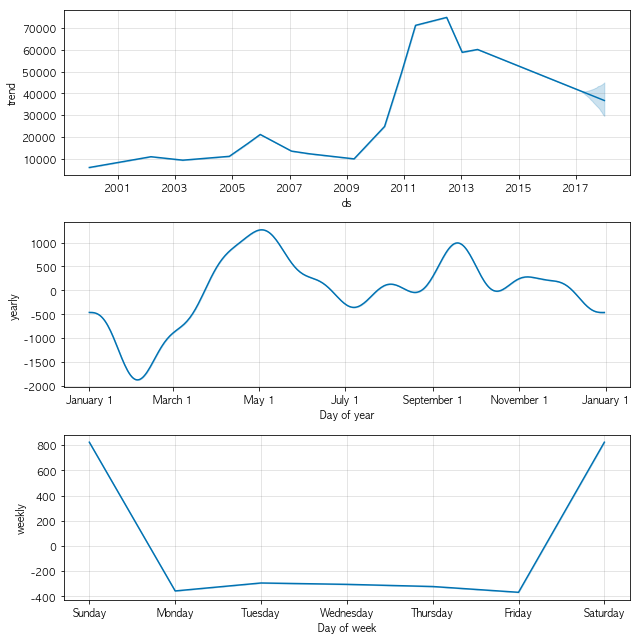

In [26]:
m.plot_components(forecast);
# 예측하라고 한 부분은 내려가거나 올라갈 수 있음
# 화, 수요일이 상대적으로 높은 주가를 유지
# 1년중 2월이 낮은 주가를 보임

[*********************100%***********************]  1 of 1 downloaded


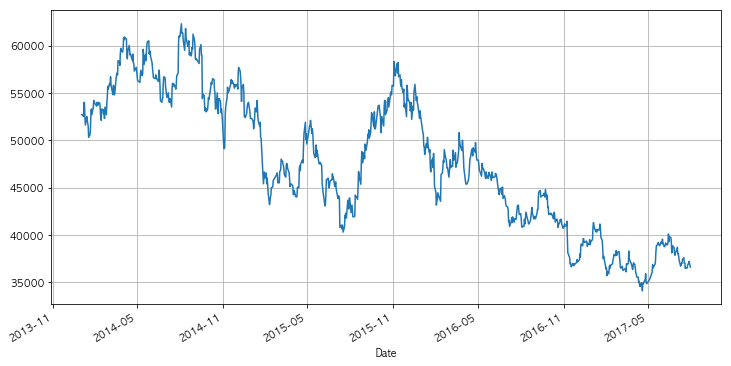

In [27]:
start_date = '2014-1-1' 
end_date = '2017-7-31' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12,6), grid=True);

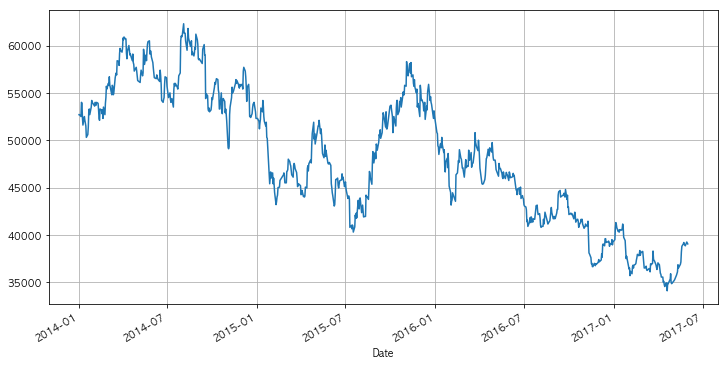

In [28]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True);

In [29]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [30]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [31]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


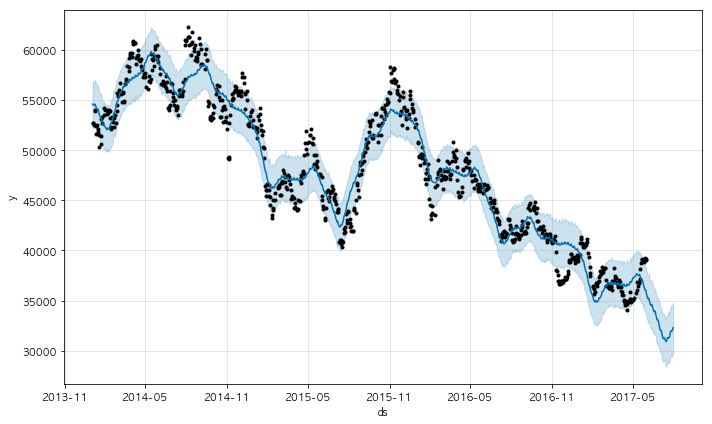

In [32]:
forecast = m.predict(future)
m.plot(forecast);

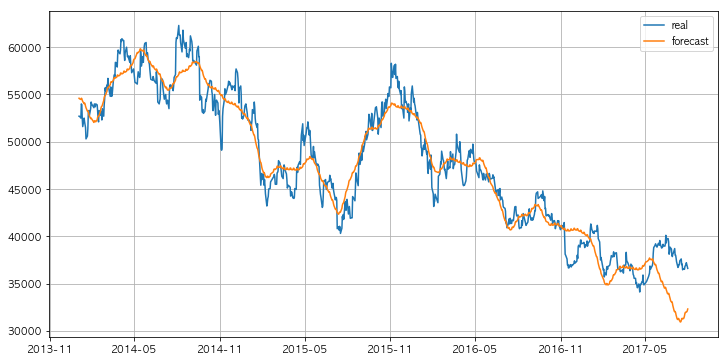

In [33]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

# 예측은 내려갔지만, 실제는 올라갔음

## 7-4 Growth Model과 Holiday Forecast

In [34]:
# 아래는 Prophet의 튜토리얼에 있는 내용들 -> 시간될 때 살펴보기
df = pd.read_csv('../data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])

In [35]:
df['cap'] = 8.5

In [36]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

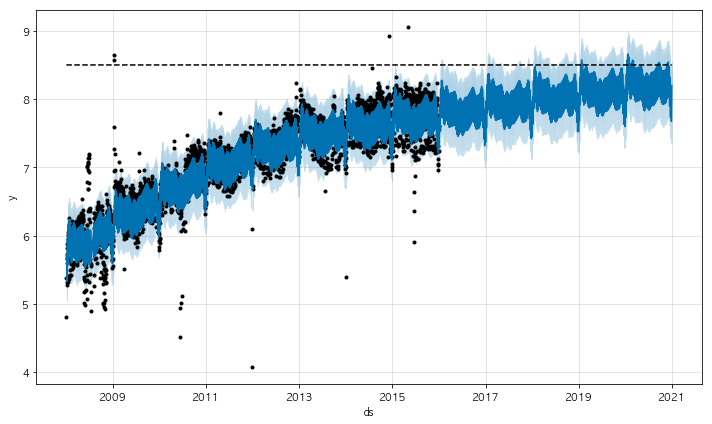

In [37]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

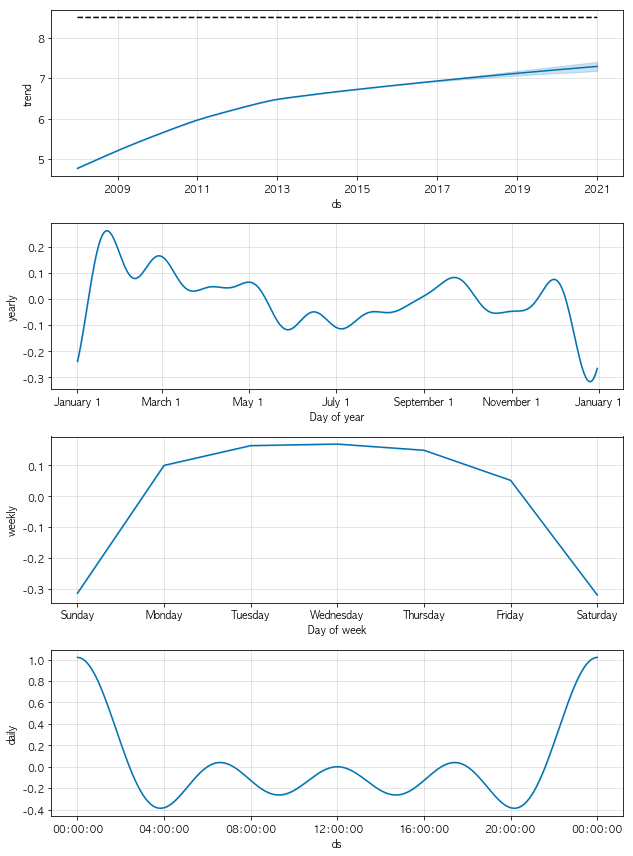

In [38]:
forecast = m.predict(future)
m.plot_components(forecast);

## holiday

In [39]:
df = pd.read_csv('../data/08. example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
m = Prophet(daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=366)

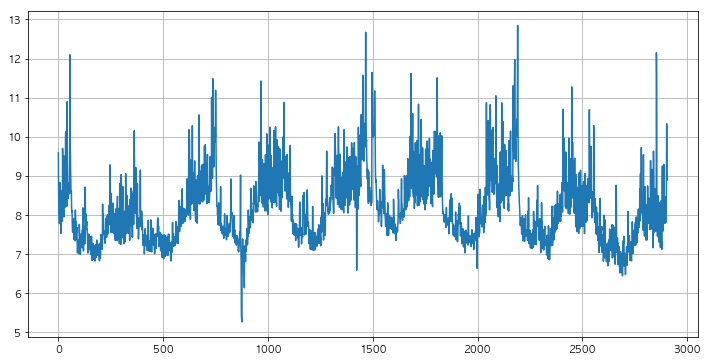

In [40]:
df.y.plot(figsize=(12,6), grid=True);

In [41]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [42]:
m = Prophet(holidays=holidays, daily_seasonality=True)
forecast = m.fit(df).predict(future)

In [43]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.218257,1.224241
2191,2014-02-03,1.898112,1.481042
2532,2015-01-11,1.218257,0.000000
2533,2015-01-12,1.898112,0.000000
2901,2016-01-17,1.218257,0.000000
2902,2016-01-18,1.898112,0.000000
2908,2016-01-24,1.218257,0.000000
2909,2016-01-25,1.898112,0.000000
2922,2016-02-07,1.218257,1.224241
2923,2016-02-08,1.898112,1.481042


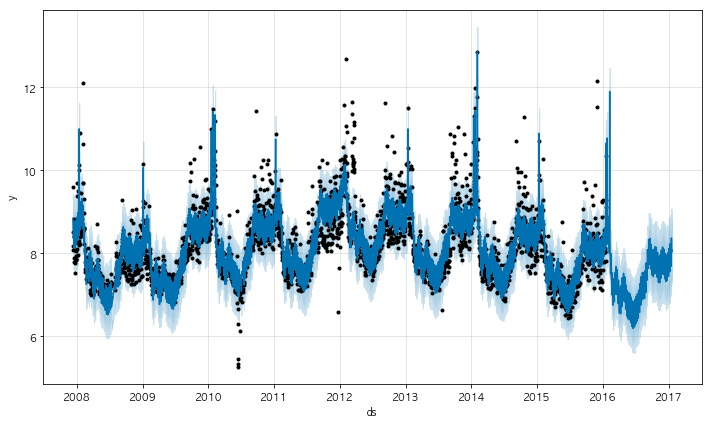

In [44]:
m.plot(forecast);

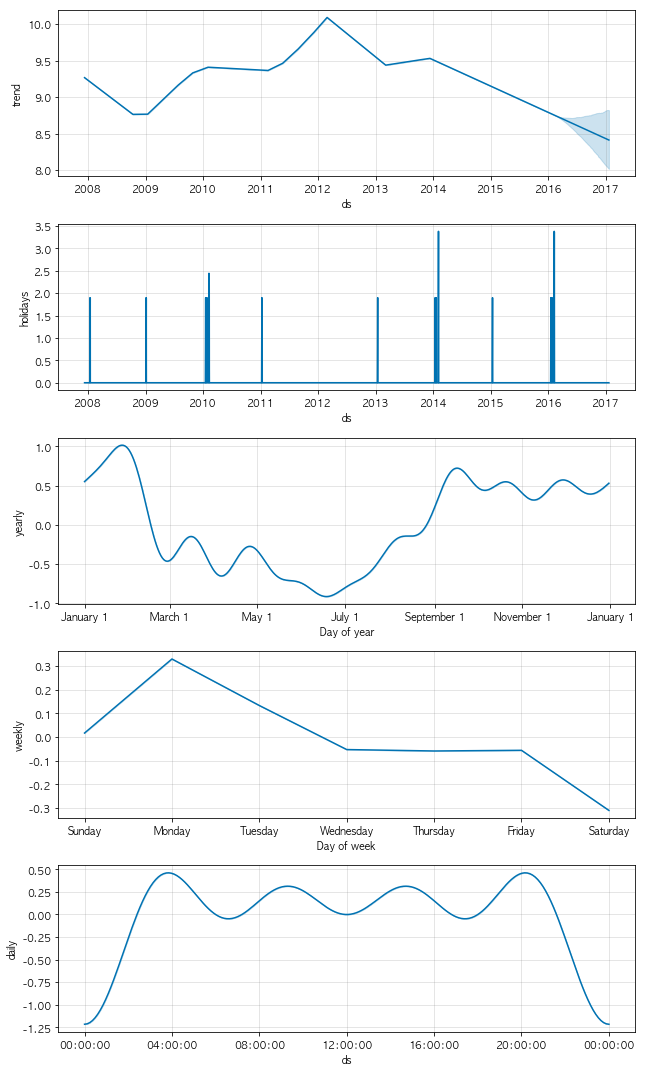

In [45]:
m.plot_components(forecast);

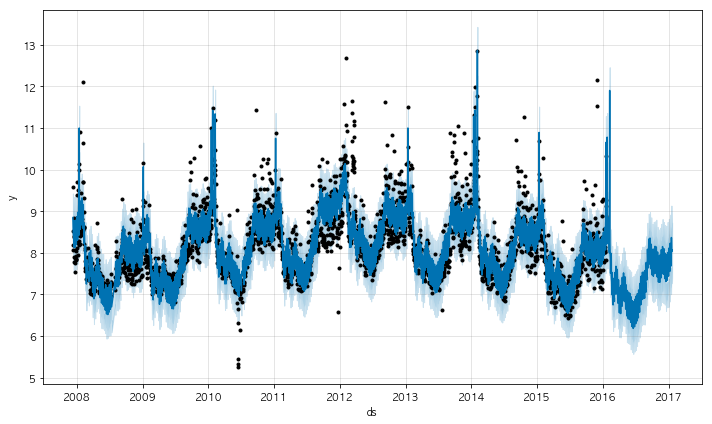

In [46]:
forecast = m.predict(future)
m.plot(forecast);

In [47]:
df = pd.read_csv('../data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])

In [48]:
df['cap'] = 8.5

In [49]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

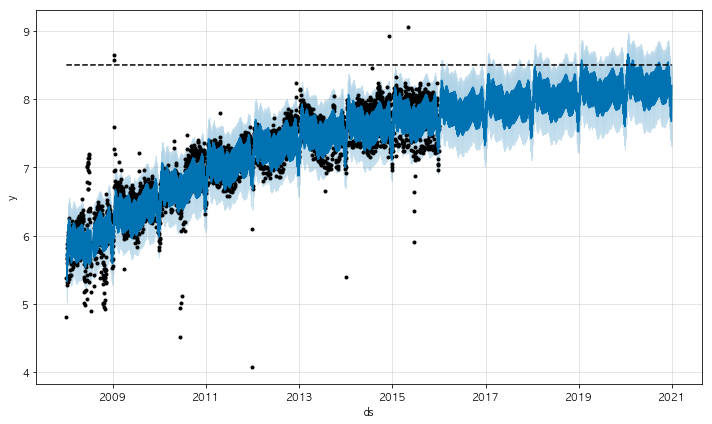

In [50]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

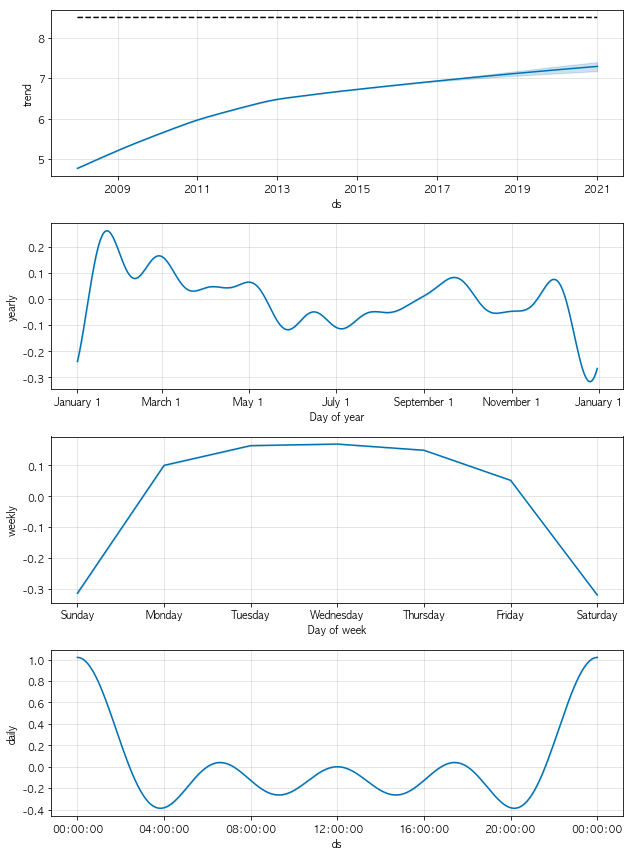

In [51]:
forecast = m.predict(future)
m.plot_components(forecast);